In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = list(np.ravel(last_date))[0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')
last_date

datetime.datetime(2017, 8, 23, 0, 0)

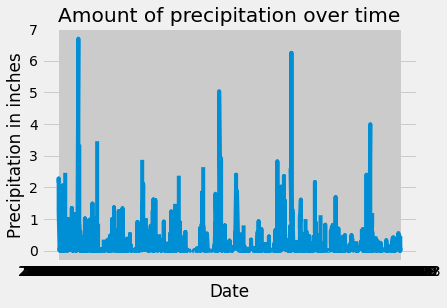

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

data_df = pd.DataFrame.from_records(data, columns=["date", "prcp"])
data_df.set_index('date', inplace=True)

# Sort the dataframe by date
data_df = data_df.sort_values(by=["date"])

# Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.pyplot as plt

plt.plot(data_df.index,data_df['prcp'])
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.title("Amount of precipitation over time")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count=func.count(Measurement.station)
station_activity = session.query(Measurement.station, station_count).group_by(Measurement.station).order_by(station_count.desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

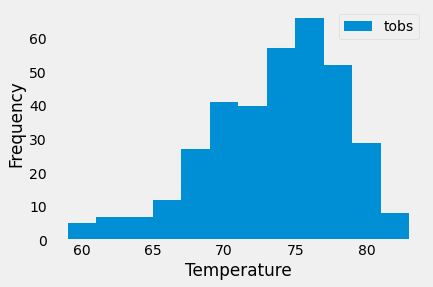

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mas_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(Measurement.date > last_year).all()
mas_data_df = pd.DataFrame.from_records(mas_data, columns=["station", "tobs"])
mas_data_df.set_index('station',inplace=True)
mas_data_df.plot.hist(by='station',bins=12)
plt.grid()
plt.xlabel("Temperature")
plt.show()

In [17]:
# Close Session
session.close()